# This is an example of machine learning for baseball predictions using Python and Scikit.  The example comes from Datacamp: https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-1#gs.lT3p_ao

First we need to load the dataset.  Some guy named Lahman was kind enough to download the dataset and convert it to a sqlite table.  We'll load the data below.

In [9]:
# import `pandas` and `sqlite3`
import pandas as pd
import sqlite3

# Connecting to SQLite Database
conn = sqlite3.connect("C:/ProgramData/Anaconda3/baseball/lahman2016.sqlite")

Next we need to write a query, execute said query, and then fetch the results.

In [10]:
# Querying Database for all seasons where a team played 150 or more games and is still active today. 
query = '''select * from Teams 
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == 'Y';
'''

# Creating dataframe from query.
Teams = conn.execute(query).fetchall()

Using pandas, convert the results to a DataFrame and print the first 5 rows using the head() method to ensure it looks right.

In [11]:
# Convert results to DataFrame
teams_df = pd.DataFrame(Teams)

# Print out first 5 rows
print(teams_df.head())

     0   1    2    3     4   5    6     7   8   9   ...        42   43   44  \
0  1961  AL  LAA  ANA  None   8  162  82.0  70  91  ...    603510  111  112   
1  1962  AL  LAA  ANA  None   3  162  81.0  86  76  ...   1144063   97   97   
2  1963  AL  LAA  ANA  None   9  161  81.0  70  91  ...    821015   94   94   
3  1964  AL  LAA  ANA  None   5  162  81.0  82  80  ...    760439   90   90   
4  1965  AL  CAL  ANA  None   7  162  80.0  75  87  ...    566727   97   98   

    45   46   47   48                             49  50    51  
0  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
1  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
2  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
3  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
4  CAL  CAL  CAL  ANA  Los Angeles Angels of Anaheim   Y  None  

[5 rows x 52 columns]


Each of the columns contain data related to a specific team and year. Some of the more important variables are listed below.
yearID - Year
teamID - Team
franchID - Franchise (links to TeamsFranchise table)
G - Games played
W - Wins
LgWin - League Champion(Y or N)
WSWin - World Series Winner (Y or N)
R - Runs scored
AB - At bats
H - Hits by batters
HR - Homeruns by batters
BB - Walks by batters
SO - Strikeouts by batters
SB - Stolen bases
CS - Caught stealing
HBP - Batters hit by pitch
SF - Sacrifice flies
RA - Opponents runs scored
ER - Earned runs allowed
ERA - Earned run average
CG - Complete games
SHO - Shutouts
SV - Saves
IPOuts - Outs Pitched (innings pitched x 3)
HA - Hits allowed
HRA - Homeruns allowed
BBA - Walks allowed
SOA - Strikeouts by pitchers
E - Errors
DP - Double Plays
FP - Fielding percentage
name - Team’s full name

Cleaning and Preparing The Data
As you can see above, the DataFrame doesn’t have column headers. You can add headers by passing a list of your headers to the columns attribute from pandas.

In [12]:
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
teams_df.columns = cols

# Print the first rows of `teams_df`
print(teams_df.head())

# Print the length of `teams_df`
print(len(teams_df))

   yearID lgID teamID  franchID divID  Rank    G  Ghome   W   L   ...     \
0    1961   AL    LAA       ANA  None     8  162   82.0  70  91   ...      
1    1962   AL    LAA       ANA  None     3  162   81.0  86  76   ...      
2    1963   AL    LAA       ANA  None     9  161   81.0  70  91   ...      
3    1964   AL    LAA       ANA  None     5  162   81.0  82  80   ...      
4    1965   AL    CAL       ANA  None     7  162   80.0  75  87   ...      

  attendance  BPF  PPF teamIDBR  teamIDlahman45  teamIDretro  franchID  \
0     603510  111  112      LAA             LAA          LAA       ANA   
1    1144063   97   97      LAA             LAA          LAA       ANA   
2     821015   94   94      LAA             LAA          LAA       ANA   
3     760439   90   90      LAA             LAA          LAA       ANA   
4     566727   97   98      CAL             CAL          CAL       ANA   

                      franchName  active  NAassoc  
0  Los Angeles Angels of Anaheim       Y     N

The len() function will let you know how many rows you’re dealing with: 2,287 is not a huge number of data points to work with, so hopefully there aren’t too many null values.

Prior to assessing the data quality, let’s first eliminate the columns that aren’t necessary or are derived from the target column (Wins). This is where knowledge of the data you are working with starts to become very valuable. It doesn’t matter how much you know about coding or statistics if you don’t have any knowledge of the data that you’re working with. Being a lifelong baseball fan certainly helped me with this project.

In [13]:
# Dropping your unnecesary column variables.
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']

df = teams_df.drop(drop_cols, axis=1)

# Print out first rows of `df`
print(df.head())

   yearID teamID    G   W    R    AB     H   2B  3B   HR  ...    SHO  SV  \
0    1961    LAA  162  70  744  5424  1331  218  22  189  ...      5  34   
1    1962    LAA  162  86  718  5499  1377  232  35  137  ...     15  47   
2    1963    LAA  161  70  597  5506  1378  208  38   95  ...     13  31   
3    1964    LAA  162  82  544  5362  1297  186  27  102  ...     28  41   
4    1965    CAL  162  75  527  5354  1279  200  36   92  ...     14  33   

   IPouts    HA  HRA  BBA  SOA    E     DP     FP  
0    4314  1391  180  713  973  192  154.0  0.969  
1    4398  1412  118  616  858  175  153.0  0.972  
2    4365  1317  120  578  889  163  155.0  0.974  
3    4350  1273  100  530  965  138  168.0  0.978  
4    4323  1259   91  563  847  123  149.0  0.981  

[5 rows x 29 columns]


As you read above, null values influence the data quality, which in turn can cause issues with machine learning algorithms.

That’s why you’ll remove those next. There are a few ways to eliminate null values, but it might be a better idea to first display the count of null values for each column so you can decide how to best handle them.

In [14]:
# Print out null values of all columns of `df`
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 419, 1777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


And here’s where you’ll see a trade-off: you need clean data, but you also don’t have a large amount of data to spare. Two of the columns have a relatively small amount of null values. There are 110 null values in the SO (Strike Outs) column and 22 in the DP (Double Play) column. Two of the columns have a relatively large amount of them. There are 419 null values in the CS (Caught Stealing) column and 1777 in the HBP (Hit by Pitch) column.

If you eliminate the rows where the columns have a small number of null values, you’re losing a little over five percent of our data. Since you’re trying to predict wins, runs scored and runs allowed are highly correlated with the target. You want data in those columns to be very accurate.

Strike outs (SO) and double plays (DP) aren’t as important.

I think you’re better off keeping the rows and filling the null values with the median value from each of the columns by using the fillna() method. Caught stealing (CS) and hit by pitch (HBP) aren’t very important variables either. With so many null values in these columns, it’s best to eliminate the columns all together.

In [15]:
# Eliminating columns with null values
df = df.drop(['CS','HBP'], axis=1)

# Filling null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

# Print out null values of all columns of `df`
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Exploring and Visualizing The Data
Now that you’ve cleaned up your data, you can do some exploration. You can get a better feel for the data set with a few simple visualizations. matplotlib is an excellent library for data visualization.

You import matplotlib.pyplot and rename it as plt for efficiency. If you’re working with a Jupyter notebook, you need to use the %matplotlib inline magic.

You’ll start by plotting a histogram of the target column so you can see the distribution of wins.

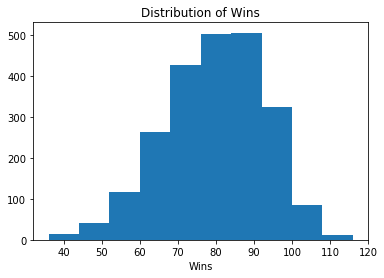

In [16]:
# import `matplotlib.pyplot` 
import matplotlib.pyplot as plt

# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

Print out the average wins (W) per year. You can use the mean() method for this.

In [17]:
print(df['W'].mean())

79.23043288150416


It can be useful to create bins for your target column while exploring your data, but you need to make sure not to include any feature that you generate from your target column when you train the model. Including a column of labels generated from the target column in your training set would be like giving your model the answers to the test.

To create your win labels, you’ll create a function called assign_win_bins which will take in an integer value (wins) and return an integer of 1-5 depending on the input value.

Next, you’ll create a new column win_bins by using the apply() method on the wins column and passing in the assign_win_bins() function.

In [18]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
df['win_bins'] = df['W'].apply(assign_win_bins)

Now let’s make a scatter graph with the year on the x-axis and wins on the y-axis and highlight the win_bins column with colors.

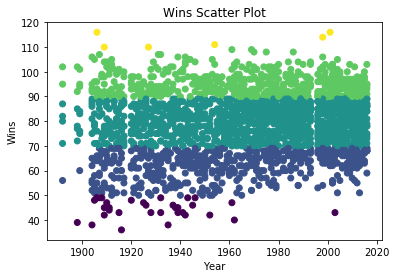

In [19]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')
plt.show()

As you can see in the above scatter plot, there are very few seasons from before 1900 and the game was much different back then. Because of that, it makes sense to eliminate those rows from the data set.

In [20]:
# Filter for rows where 'yearID' is greater than 1900
df = df[df['yearID'] > 1900]

When dealing with continuous data and creating linear models, integer values such as a year can cause issues. It is unlikely that the number 1950 will have the same relationship to the rest of the data that the model will infer.

You can avoid these issues by creating new variables that label the data based on the yearID value.

Anyone who follows the game of baseball knows that, as Major League Baseball (MLB) progressed, different eras emerged where the amount of runs per game increased or decreased significantly. The dead ball era of the early 1900s is an example of a low scoring era and the steroid era at the turn of the 21st century is an example of a high scoring era.

Let’s make a graph below that indicates how much scoring there was for each year.

You’ll start by creating dictionaries runs_per_year and games_per_year. Loop through the dataframe using the iterrows() method. Populate the runs_per_year dictionary with years as keys and how many runs were scored that year as the value. Populate the games_per_year dictionary with years as keys and how many games were played that year as the value.

In [21]:
# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
print(runs_per_year)
print(games_per_year)

{1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 1982: 18110, 1983: 18170, 1984: 17921, 1985: 18216, 1986: 18545, 1987: 19883, 1988: 17380, 1989: 17405, 1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744, 1904: 9307, 1905: 9640, 1906: 8322, 1907: 8186, 1908: 8423, 1909: 8805, 1910: 9580, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 9408, 1915: 9444, 1916: 8889, 1917: 8948, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 12596, 1926: 11443, 1927: 11745, 1928: 11645, 1929: 12747, 1930: 1369

Next, create a dictionary called mlb_runs_per_game. Iterate through the games_per_year dictionary with the items() method. Populate the mlb_runs_per_game dictionary with years as keys and the number of runs scored per game, league wide, as the value.

In [22]:
# Create MLB runs per game (per year) dictionary
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games
    
print(mlb_runs_per_game)

{1961: 4.525174825174825, 1962: 4.460518198642813, 1963: 3.9468807906114884, 1964: 4.035670356703567, 1965: 3.9882932840418976, 1966: 3.9938080495356036, 1967: 3.7685185185185186, 1968: 3.4181538461538463, 1969: 4.07245632065776, 1970: 4.341563786008231, 1971: 3.8888028895768834, 1972: 3.6863905325443787, 1973: 4.214101904271745, 1974: 4.124935732647815, 1975: 4.21277145811789, 1976: 3.99484270242393, 1977: 4.470518307180218, 1978: 4.103472882968601, 1979: 4.457598856598381, 1980: 4.2881235154394295, 1982: 4.297579496915045, 1983: 4.307728781412992, 1984: 4.256769596199525, 1985: 4.330955777460771, 1986: 4.409177365668093, 1987: 4.722802850356294, 1988: 4.1380952380952385, 1989: 4.132241215574549, 1990: 4.256294536817102, 1991: 4.307747148288973, 1992: 4.1170465337132, 1993: 4.597620096959012, 1996: 5.0355094838994265, 1997: 4.766990291262136, 1998: 4.789679276315789, 1999: 5.0846375617792425, 2000: 5.140181144503911, 2001: 4.7754219843557015, 2002: 4.6183017312448476, 2003: 4.72798353

Finally, create your plot from the mlb_runs_per_game dictionary by putting the years on the x-axis and runs per game on the y-axis.

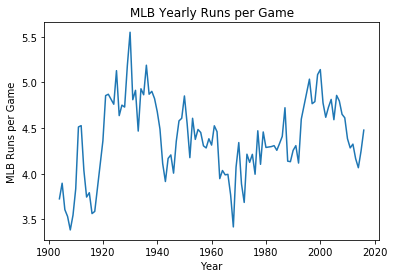

In [23]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')
plt.show()

Adding New Features
Now that you have a better idea of scoring trends, you can create new variables that indicate a specific era that each row of data falls in based on the yearID. You’ll follow the same process as you did above when you created the win_bins column.

This time however, you will create dummy columns; a new column for each era. You can use the get_dummies() method for this.

In [24]:
# Creating "year_label" column, which will give your algorithm information about how certain years are related 
# (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# Add `year_label` column to `df`    
df['year_label'] = df['yearID'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix='era')

# Concatenate `df` and `dummy_df`
df = pd.concat([df, dummy_df], axis=1)

print(df.head())

   yearID teamID    G   W    R    AB     H   2B  3B   HR  ...    win_bins  \
0    1961    LAA  162  70  744  5424  1331  218  22  189  ...           3   
1    1962    LAA  162  86  718  5499  1377  232  35  137  ...           3   
2    1963    LAA  161  70  597  5506  1378  208  38   95  ...           3   
3    1964    LAA  162  82  544  5362  1297  186  27  102  ...           3   
4    1965    CAL  162  75  527  5354  1279  200  36   92  ...           3   

   year_label  era_1  era_2  era_3  era_4  era_5  era_6  era_7  era_8  
0           4      0      0      0      1      0      0      0      0  
1           4      0      0      0      1      0      0      0      0  
2           5      0      0      0      0      1      0      0      0  
3           5      0      0      0      0      1      0      0      0  
4           5      0      0      0      0      1      0      0      0  

[5 rows x 37 columns]


Since you already did the work to determine MLB runs per game for each year, add that data to the data set.

In [25]:
# Create column for MLB runs per game from the mlb_runs_per_game dictionary
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]

df['mlb_rpg'] = df['yearID'].apply(assign_mlb_rpg)

Now you’ll convert the years into decades by creating dummy columns for each decade. Then you can drop the columns that you don’t need anymore.

In [26]:
# Convert years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'], prefix='decade')
df = pd.concat([df, decade_df], axis=1)

# Drop unnecessary columns
df = df.drop(['yearID','year_label','decade_label'], axis=1)

The bottom line in the game of baseball is how many runs you score and how many runs you allow. You can significantly increase the accuracy of your model by creating columns which are ratios of other columns of data. Runs per game and runs allowed per game will be great features to add to our data set.

Pandas makes this very simple as you create a new column by dividing the R column by the G column to create the R_per_game column.

In [27]:
# Create new features for Runs per Game and Runs Allowed per Game
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']

Now look at how each of the two new variables relate to the target wins column by making a couple scatter graphs. Plot the runs per game on the x-axis of one graph and runs allowed per game on the x-axis of the other. Plot the W column on each y-axis.

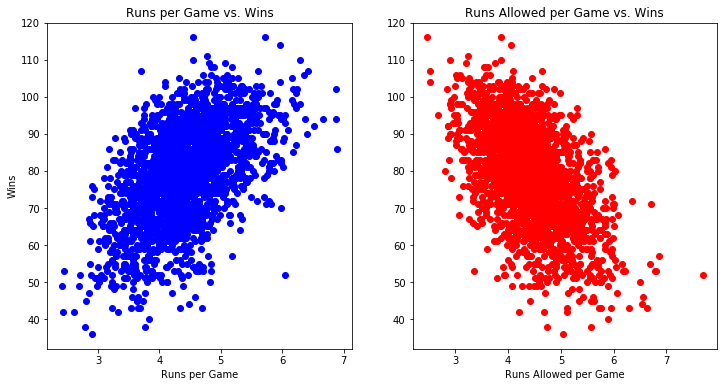

In [28]:
# Create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'], df['W'], c='blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

Before getting into any machine learning models, it can be useful to see how each of the variables is correlated with the target variable. Pandas makes this easy with the corr() method.

In [29]:
df.corr()['W']

G              0.178958
W              1.000000
R              0.551504
AB             0.233996
H              0.380281
2B             0.262323
3B             0.016970
HR             0.312713
BB             0.345348
SO             0.072069
SB             0.133300
RA            -0.518313
ER            -0.372580
ERA           -0.425833
CG            -0.041788
SHO            0.426892
SV             0.382174
IPouts         0.326087
HA            -0.384893
HRA            0.009880
BBA           -0.284782
SOA            0.259205
E             -0.304725
DP             0.015192
FP             0.319597
win_bins       0.912545
era_1         -0.077104
era_2         -0.083089
era_3         -0.033073
era_4         -0.052278
era_5          0.042122
era_6          0.058439
era_7          0.066049
era_8          0.043453
mlb_rpg        0.006909
decade_1910   -0.077104
decade_1920   -0.055176
decade_1930   -0.052358
decade_1940   -0.050249
decade_1950   -0.047499
decade_1960    0.028594
decade_1970    0

Another feature you can add to the dataset are labels derived from a K-means cluster algorithm provided by sklearn. K-means is a simple clustering algorithm that partitions the data based on the number of k centroids you indicate. Each data point is assigned to a cluster based on which centroid has the lowest Euclidian distance from the data point.

You can learn more about K-means clustering here.

First, create a DataFrame that leaves out the target variable:

In [30]:
attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG',
'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg']

data_attributes = df[attributes]

# Print the first rows of `df`
print(df.head())

  teamID    G   W    R    AB     H   2B  3B   HR   BB     ...       \
0    LAA  162  70  744  5424  1331  218  22  189  681     ...        
1    LAA  162  86  718  5499  1377  232  35  137  602     ...        
2    LAA  161  70  597  5506  1378  208  38   95  448     ...        
3    LAA  162  82  544  5362  1297  186  27  102  472     ...        
4    CAL  162  75  527  5354  1279  200  36   92  443     ...        

   decade_1940  decade_1950  decade_1960  decade_1970  decade_1980  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0            0            1            0            0   
3            0            0            1            0            0   
4            0            0            1            0            0   

   decade_1990  decade_2000  decade_2010  R_per_game  RA_per_game  
0            0            0            0    4.592593     4.839506  
1            0        

One aspect of K-means clustering that you must determine before using the model is how many clusters you want. You can get a better idea of your ideal number of clusters by using sklearn’s silhouette_score() function. This function returns the mean silhouette coefficient over all samples. You want a higher silhouette score, and the score decreases as more clusters are added.

In [31]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.39069988022938779], 3: [0.33807585484810926], 4: [0.25340940061017991], 5: [0.23561577404187492], 6: [0.21388694120818216], 7: [0.19570350588885863], 8: [0.18660857478527418], 9: [0.17354548788709254], 10: [0.16986446409819547]}


Now you can initialize the model. Set your number of clusters to 6 and the random state to 1. Determine the Euclidian distances for each data point by using the fit_transform() method and then visualize the clusters with a scatter plot.

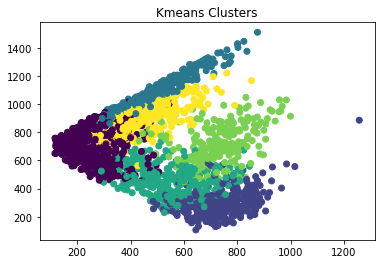

In [32]:
# Create K-means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

Now add the labels from your clusters into the data set as a new column. Also add the string “labels” to the attributes list, for use later.

In [33]:
# Add labels from K-means model to `df` DataFrame and attributes list
df['labels'] = labels
attributes.append('labels')

# Print the first rows of `df`
print(df.head())

  teamID    G   W    R    AB     H   2B  3B   HR   BB   ...    decade_1950  \
0    LAA  162  70  744  5424  1331  218  22  189  681   ...              0   
1    LAA  162  86  718  5499  1377  232  35  137  602   ...              0   
2    LAA  161  70  597  5506  1378  208  38   95  448   ...              0   
3    LAA  162  82  544  5362  1297  186  27  102  472   ...              0   
4    CAL  162  75  527  5354  1279  200  36   92  443   ...              0   

   decade_1960  decade_1970  decade_1980  decade_1990  decade_2000  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            1            0            0            0            0   
4            1            0            0            0            0   

   decade_2010  R_per_game  RA_per_game  labels  
0            0    4.592593     4.839506       5  
1         

Before you can build your model, you need to split your data into train and test sets. You do this because if you do decide to train your model on the same data that you test the model, your model can easily overfit the data: the model will more memorize the data instead of learning from it, which results in excessively complex models for your data. That also explains why an overfitted model will perform very poorly when you would try to make predictions with new data.

But don’t worry just yet, there are a number of ways to cross-validate your model.

This time, you will simply take a random sample of 75 percent of our data for the train data set and use the other 25 percent for your test data set. Create a list numeric_cols with all of the columns you will use in your model. Next, create a new DataFrame data from the df DataFrame with the columns in the numeric_cols list. Then, also create your train and test data sets by sampling the DataFrame data.

In [34]:
# Create new DataFrame using only variables to be included in models
numeric_cols = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg','labels','W']
data = df[numeric_cols]
print(data.head())

# Split data DataFrame into train and test sets
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

     G    R    AB     H   2B  3B   HR   BB      SO   SB ...  decade_1970  \
0  162  744  5424  1331  218  22  189  681  1068.0   37 ...            0   
1  162  718  5499  1377  232  35  137  602   917.0   46 ...            0   
2  161  597  5506  1378  208  38   95  448   916.0   43 ...            0   
3  162  544  5362  1297  186  27  102  472   920.0   49 ...            0   
4  162  527  5354  1279  200  36   92  443   973.0  107 ...            0   

   decade_1980  decade_1990  decade_2000  decade_2010  R_per_game  \
0            0            0            0            0    4.592593   
1            0            0            0            0    4.432099   
2            0            0            0            0    3.708075   
3            0            0            0            0    3.358025   
4            0            0            0            0    3.253086   

   RA_per_game   mlb_rpg  labels   W  
0     4.839506  4.525175       5  70  
1     4.358025  4.460518       0  86  
2     4.099

Selecting Error Metric and Model
Mean Absolute Error (MAE) is the metric you’ll use to determine how accurate your model is. It measures how close the predictions are to the eventual outcomes. Specifically, for this data, that means that this error metric will provide you with the average absolute value that your prediction missed its mark.

This means that if, on average, your predictions miss the target amount by 5 wins, your error metric will be 5.

The first model you will train will be a linear regression model. You can import LinearRegression and mean_absolute_error from sklearn.linear_model and sklearn.metrics respectively, and then create a model lr. Next, you’ll fit the model, make predictions and determine mean absolute error of the model.

In [35]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print `mae`
print(mae)

2.688790229


If you recall from above, the average number of wins was about 79 wins. On average, the model is off by only 2.687 wins.

Now try a Ridge regression model. Import RidgeCV from sklearn.linear_model and create model rrm. The RidgeCV model allows you to set the alpha parameter, which is a complexity parameter that controls the amount of shrinkage (read more here). The model will use cross-validation to deterime which of the alpha parameters you provide is ideal.

Again, fit your model, make predictions and determine the mean absolute error.

In [36]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

2.67259187465


This model performed slightly better, and is off by 2.673 wins, on average.

Sports Analytics & Scikit-Learn
This concludes the first part of this tutorial series in which you have seen how you can use scikit-Learn to analyze sports data. You imported the data from an SQLite database, cleaned it up, explored aspects of it visually, and engineered several new features. You learned how to create a K-means clustering model, a couple different Linear Regression models, and how to test your predictions with the mean absolute error metric.